In [29]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('../../data/cleaned/features.csv')
target =  pd.read_csv('../../data/cleaned/labels.csv')
df.shape, target.shape

((972, 152), (972, 2))

In [8]:
target = target.drop('ID', axis=1)
df = df.drop('ID', axis=1)

In [9]:
target.shape, df.shape

((972, 1), (972, 151))

In [10]:
target['label'].unique()

array(['8-Van', '5-Lem', '4-Rose', '6-Ger', '3-Ethyl', '2-Hex', '7-Cit',
       '1-Benz'], dtype=object)

In [35]:
label_names_replace = {label:label.split("-")[1] for label in target["label"].unique()}
target["label"].replace(label_names_replace, inplace=True)

In [36]:
dico = {'Van':8, 'Lem':5, 'Rose':4, 'Ger':6, 'Ethyl':3, 'Hex':2, 'Cit':7,
       'Benz':1}

In [ ]:
# dico = {'8-Van':8, '5-Lem':5, '4-Rose':4, '6-Ger':6, '3-Ethyl':3, '2-Hex':2, '7-Cit':7,
#        '1-Benz':1}

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)

In [51]:
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X_train_t)
embedding.shape

(651, 2)

In [40]:
y_train['label'].values.shape

(651,)

In [41]:
X_train.shape

(651, 151)

In [48]:
color_code = y_train['label'].map(dico)
color_code.array

<PandasArray>
[1, 1, 2, 8, 8, 1, 2, 5, 3, 2,
 ...
 2, 3, 5, 4, 3, 2, 7, 4, 6, 2]
Length: 651, dtype: int64

In [96]:
embedding_df = pd.DataFrame(embedding, columns=["Embedding_1","Embedding_2"])
embedding_df["Odors"] = y_train['label'].values
# embedding_df.set_index(["Odors"], inplace=True)
embedding_df

,Embedding_1,Embedding_2,Odors
0,3.241318,7.335864,Benz
1,8.370169,4.720019,Benz
2,2.601418,6.804608,Hex
3,12.197691,1.734867,Van
4,8.647899,2.036354,Van
...,...,...,...
646,5.927616,7.122180,Hex
647,10.109402,0.854256,Cit
648,5.441441,3.568181,Rose
649,10.947395,1.251355,Ger


In [112]:
embedding_df['Odors'].map(dico)

0      1
1      1
2      2
3      8
4      8
      ..
646    2
647    7
648    4
649    6
650    2
Name: Odors, Length: 651, dtype: int64

Text(0.5, 1.0, 'UMAP projection of the dataset')

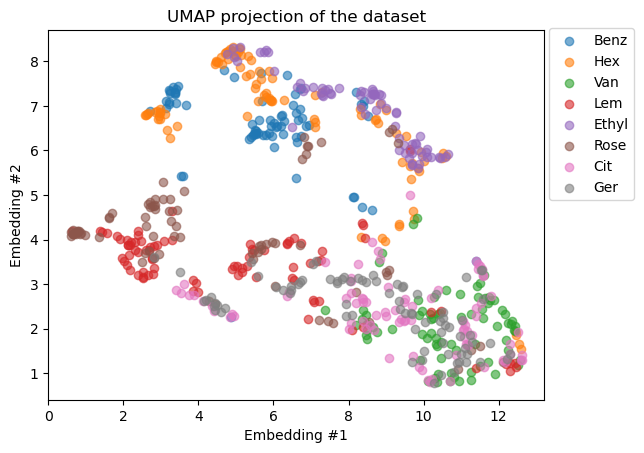

In [140]:
for odor in embedding_df['Odors'].unique():
    odor_df = embedding_df[embedding_df['Odors'] == odor]
    plt.scatter(odor_df["Embedding_1"], odor_df["Embedding_2"],alpha=0.6, label=odor)

plt.legend(loc=(1.01,0.54))
plt.xlabel("Embedding #1")
plt.ylabel("Embedding #2")
plt.title('UMAP projection of the dataset')

Text(0.5, 1.0, 'UMAP projection of the dataset')

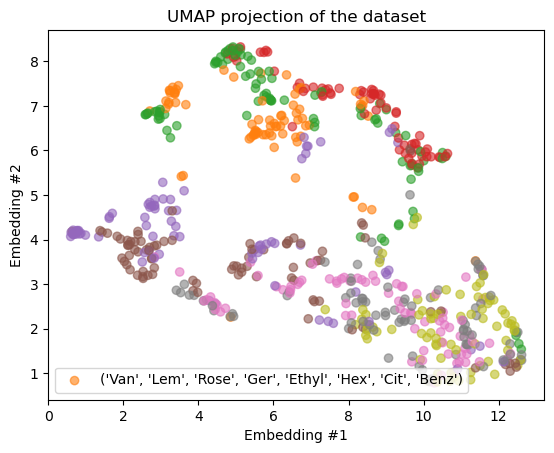

In [128]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots()

cmap = [sns.color_palette()[x] for x in embedding_df['Odors'].map(dico)]

ax.scatter(embedding_df['Embedding_1'], embedding_df['Embedding_2'], c=cmap, alpha=0.6)#, label=)
plt.legend()
plt.xlabel("Embedding #1")
plt.ylabel("Embedding #2")
plt.title('UMAP projection of the dataset')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'UMAP projection of the dataset')

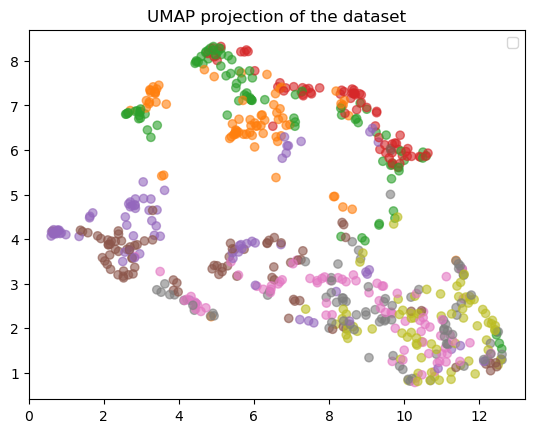

In [92]:
plt.scatter(
    embedding_df['Embedding_1'],
    embedding_df['Embedding_2'],
    c=[sns.color_palette()[x] for x in y_train['label'].map(dico)],
    alpha=0.6,
)
# plt.gca().set_aspect('equal', 'datalim')
plt.legend(loc='upper right')
plt.title('UMAP projection of the dataset')
# plt.legend(list(label_names_replace.values()))

In [23]:
x = embedding[:, 0]
y = embedding[:, 1]
z = embedding[:, 2]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

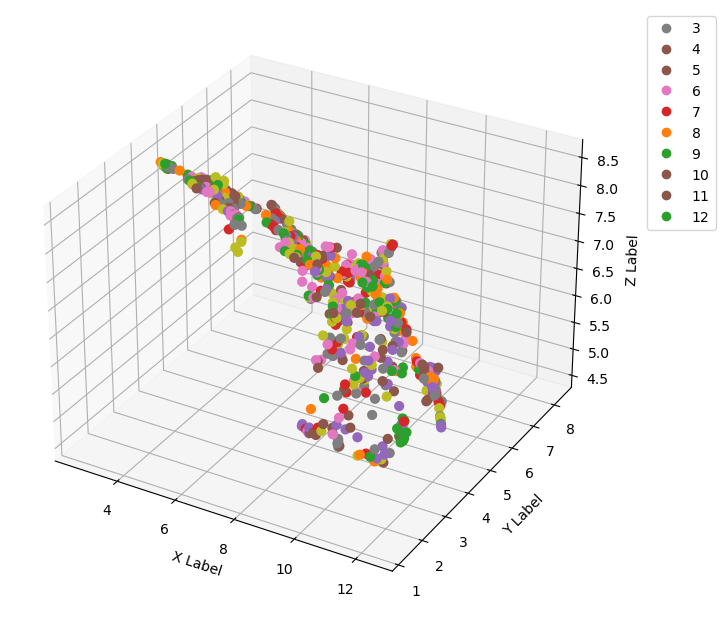

In [28]:



fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap([sns.color_palette()[x] for x in y_train['label'].map({'8-Van':8, '5-Lem':5, '4-Rose':4, '6-Ger':6, '3-Ethyl':3, '2-Hex':2, '7-Cit':7,
       '1-Benz':1}) ])

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)